<a href="https://colab.research.google.com/github/Jamolkhon5/TestPriject/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave 
import numpy as np
from google.colab import files

from PIL import Image
import matplotlib.pyplot as plt
from io import * 

In [9]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))

Saving dd45bf555fd4d854c7adc6b07f7d9a42.jpeg to dd45bf555fd4d854c7adc6b07f7d9a42.jpeg


In [10]:
def processed_image(img):
  image = img.resize((256,256),Image.BILINEAR)
  image = np.array(image, dtype = float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X,Y = lab[:,:,0], lab[:,:,1:]

  Y /=128
  X = X.reshape(1,size[0],size[1],1)
  Y = Y.reshape(1,size[0],size[1],2)
  return X, Y, size

In [11]:
X, Y, size = processed_image(img)

In [12]:
model = Sequential()
model.add(InputLayer(input_shape=(None,None,1)))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same', strides=2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same', strides=2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same', strides=2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Conv2D(2,(3,3),activation='tanh',padding='same'))
model.add(UpSampling2D((2,2)))



In [13]:
model.compile(optimizer='adam', loss = 'mse')
model.fit(x=X, y=Y, batch_size=1, epochs=50)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0233
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 0.6791
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.1741
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.0222
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.0197
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.0185
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.0224
Epoch 8/50
1/1 [==============================] - 1s 1s/step - loss: 0.0183
Epoch 9/50
1/1 [==============================] - 1s 1s/step - loss: 0.0187
Epoch 10/50
1/1 [==============================] - 1s 1s/step - loss: 0.0176
Epoch 11/50
1/1 [==============================] - 1s 1s/step - loss: 0.0195
Epoch 12/50
1/1 [==============================] - 1s 1s/step - loss: 0.0172
Epoch 13/50
1/1 [==============================] - 1s 1s/step - loss: 0.0182
Epoch 14

In [14]:
upl = files.upload()

Saving 123.jpg to 123 (1).jpg


In [15]:
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X,Y,size = processed_image(img)

1/1 [==============================] - 1s 772ms/step


/usr/local/lib/python3.8/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


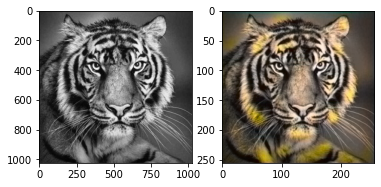

In [16]:
output = model.predict(X)
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0],size[1],3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(lab2rgb(cur))
